In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [6]:
data.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [18]:
missing = data[data['Age'].isnull()].sum()
missing

Survived      52.0000
Age            0.0000
Fare        3922.0663
dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19112\4000975104.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


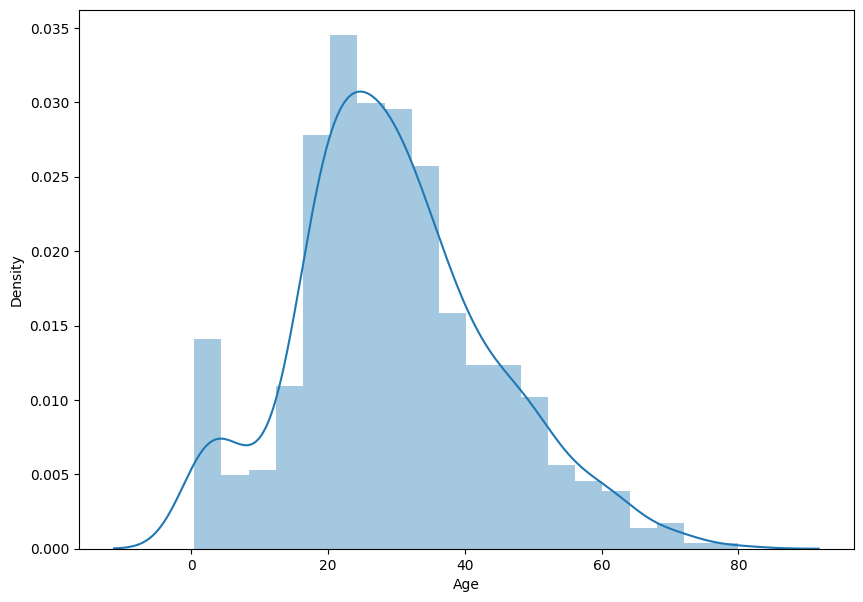

In [7]:
plt.figure(figsize=(10,7))
sns.distplot(data['Age'])
plt.show()

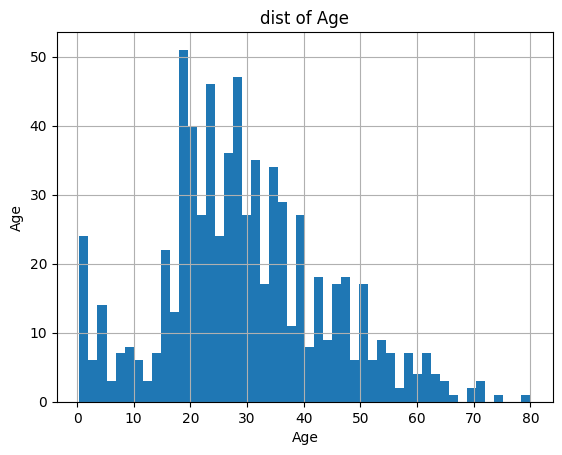

In [19]:
figure = data['Age'].hist(bins=50)
figure.set_title('dist of Age')
figure.set_xlabel('Age')
figure.set_ylabel('Age')
plt.show()

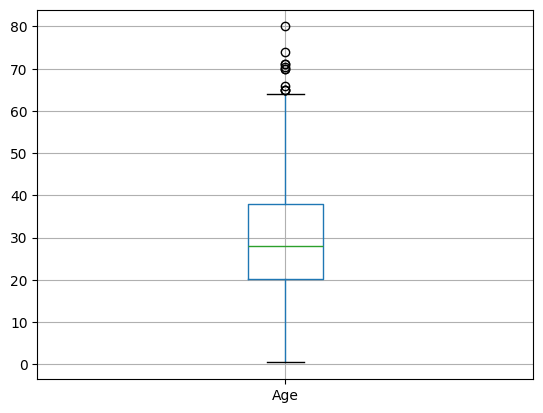

In [20]:
figure = data.boxplot(column='Age')
plt.show()

In [22]:
data[data['Age']>70]


,Survived,Age,Fare
96,0,71.0,34.6542
116,0,70.5,7.7500
493,0,71.0,49.5042
630,1,80.0,30.0000
851,0,74.0,7.7750


In [26]:
df = data.copy()

IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)

lower = df['Age'].quantile(0.25) - 1.5* IQR
upper = df['Age'].quantile(0.75) + 1.5* IQR

outliers = np.where(df['Age']>upper,True, np.where(df['Age']<lower,True,False))

df = df.loc[~(outliers)]


In [28]:
df = df[~((df['Age']<lower) & (df['Age']>upper))]


In [32]:
upper_boundary = data['Age'].mean() + 3*data['Age'].std()
lower_boundary = data['Age'].mean() - 3*data['Age'].std()
print(upper_boundary)
print(lower_boundary)

73.27860964406094
-13.880374349943303


In [33]:
df = data.copy()
df['Age'] = np.where(df['Age']>upper_boundary, upper_boundary,data['Age'])

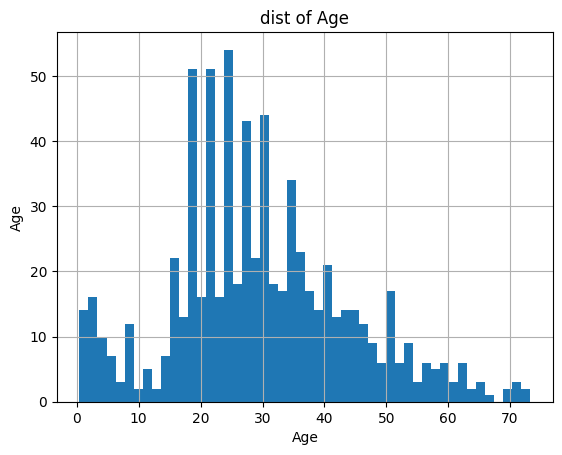

In [34]:

figure = df['Age'].hist(bins=50)
figure.set_title('dist of Age')
figure.set_xlabel('Age')
figure.set_ylabel('Age')
plt.show()

In [35]:
IQR = data['Age'].quantile(0.75) - data['Age'].quantile(0.25)
IQR

17.875

In [36]:
lower = data['Age'].quantile(0.25) - IQR * 1.5
upper = data['Age'].quantile(0.75) + IQR * 1.5

In [37]:
df = data.copy()
df['Age'] = np.where(df['Age']>upper,upper, np.where(df['Age']<lower,lower,data['Age']))

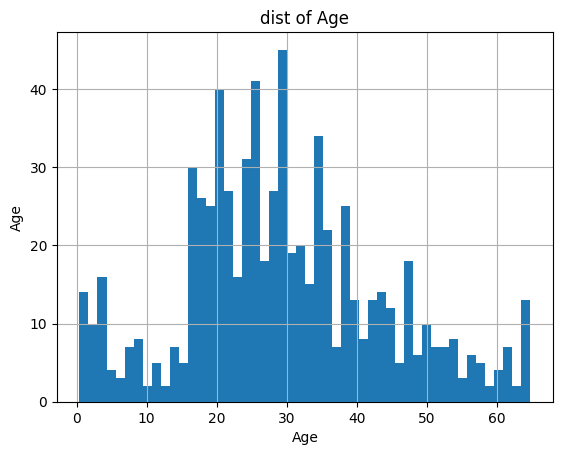

In [38]:
figure = df['Age'].hist(bins=50)
figure.set_title('dist of Age')
figure.set_xlabel('Age')
figure.set_ylabel('Age')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19112\3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

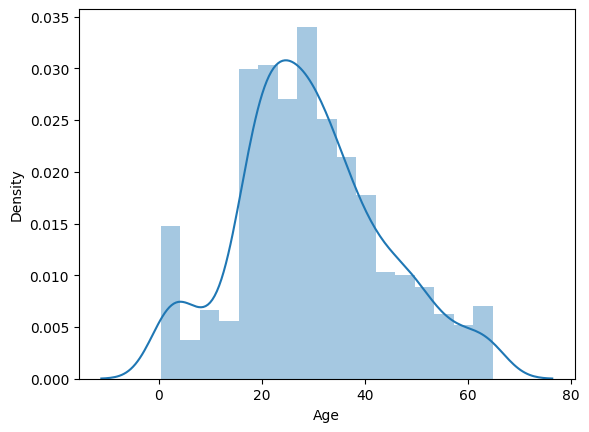

In [39]:
sns.distplot(df['Age'])